In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

from qiskit.providers.aer import AerSimulator
sim=AerSimulator()

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
ut_provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')

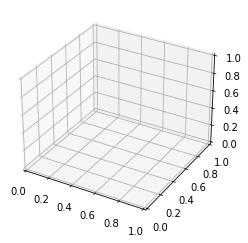

In [2]:
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection = '3d')

In [3]:
def make_bell_circuit(alpha, beta):
    qc0 = QuantumCircuit(2,2)
    qc0.x(0)
    qc0.x(1)
    qc0.h(0)
    qc0.cx(0, 1)
    qc0.rz(alpha,1)
    qc0.h(0)
    qc0.h(1)
    qc0.measure([0,1],[0,1])
    
    qc1 = QuantumCircuit(2,2)
    qc1.x(0)
    qc1.x(1)
    qc1.h(0)
    qc1.cx(0, 1)
    qc1.rz(beta,1)
    qc1.h(0)
    qc1.h(1)
    qc1.measure([0,1],[0,1])
    
    qc2 = QuantumCircuit(2,2)
    qc2.x(0)
    qc2.x(1)
    qc2.h(0)
    qc2.cx(0, 1)
    qc2.rz(alpha,0)
    qc2.rz(beta,1)
    qc2.h(0)
    qc2.h(1)
    qc2.measure([0,1],[0,1])
    return [qc0, qc1, qc2]

In [4]:
def simulate_bell_2D(x, y, shots = 4096):
    Z = np.zeros(shape = (np.size(x), np.size(y)))
    counts_sim_all = []
    
    for i in range(np.size(x)):
        counts_row = []
        for j in range(np.size(y)):
            # construct circuits
            [ qc0, qc1, qc2 ] = make_bell_circuit(x[i], y[j])


            # run circuits
            counts = []

            job0 = sim.run(qc0, shots = shots)
            counts.append(job0.result().get_counts())
            # print(str(i) + ", " + str(j) + ": " + str(result0.get_counts()))

            job1 = sim.run(qc1, shots = shots)
            counts.append(job1.result().get_counts())

            job2 = sim.run(qc2, shots = shots)
            counts.append(job2.result().get_counts())



            # calcurate results
            average = [ 0, 0, 0 ]
            for k in range(3):
                for key in counts[k]:
                    average[k] += counts[k][key] * (1 if key[0] == key[1] else -1)
                average[k] /= shots

            Z[i, j] = abs(average[0] - average[1]) - average[2]
            counts_row.append(counts)
        counts_sim_all.append(counts_row)
    return Z, counts_sim_all

def simulate_bell_1D(x, y, shots = 4096):
    if np.size(x) != np.size(y):
        return None
    Z = np.zeros(shape = (np.size(x)))
    counts_sim_all = []
    
    for i in range(np.size(x)):
        # construct circuits
        [ qc0, qc1, qc2 ] = make_bell_circuit(x[i], y[i])


        # run circuits
        counts = []

        job0 = sim.run(qc0, shots = shots)
        counts.append(job0.result().get_counts())

        job1 = sim.run(qc1, shots = shots)
        counts.append(job1.result().get_counts())

        job2 = sim.run(qc2, shots = shots)
        counts.append(job2.result().get_counts())


        # calcurate results
        average = [ 0, 0, 0 ]
        for k in range(3):
            for key in counts[k]:
                average[k] += counts[k][key] * (1 if key[0] == key[1] else -1)
            average[k] /= shots

        Z[i] = abs(average[0] - average[1]) - average[2]
        counts_sim_all.append(counts)
    return Z, counts_sim_all

In [5]:
def bell_theory(x, y):
    return abs(-np.cos(x)+np.cos(y))+np.cos(x-y)

In [6]:
x = np.linspace(-np.pi / 2, np.pi / 2, 13)
y = np.linspace(-np.pi, np.pi, 13)
x3D = np.linspace(-np.pi, np.pi, 25)
y3D = np.linspace(-np.pi, np.pi, 25)
X, Y = np.meshgrid(x3D, y3D)
Z = np.zeros(shape = (25, 25))
counts_sim_all = []

shots = 4096
Z, counts_sim_all = simulate_bell_2D(x3D, y3D, shots)

In [6]:
x_pi = np.linspace(0, np.pi, 25)
k_list = np.linspace(0, 4, 41)
y_pi = np.kron(k_list, x_pi).reshape((41, 25))
print(y_pi)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.01308997  0.02617994 ...  0.28797933  0.3010693
   0.31415927]
 [ 0.          0.02617994  0.05235988 ...  0.57595865  0.60213859
   0.62831853]
 ...
 [ 0.          0.49741884  0.99483767 ... 10.94321441 11.44063325
  11.93805208]
 [ 0.          0.51050881  1.02101761 ... 11.23119374 11.74170254
  12.25221135]
 [ 0.          0.52359878  1.04719755 ... 11.51917306 12.04277184
  12.56637061]]


In [7]:
Z_smooth = []
counts_smooth = []

for i in range(41):
    Z_temp, counts_temp = simulate_bell_1D(x_pi, y_pi[i], shots)
    Z_smooth.append(Z_temp)
    counts_smooth.append(counts_temp)

Traceback (most recent call last):
  File "/tmp/ipykernel_61/74808904.py", line 5, in <module>
    Z_temp, counts_temp = simulate_bell_1D(x_pi, y_pi[i], shots)
NameError: name 'simulate_bell_1D' is not defined

Use %tb to get the full traceback.


In [8]:
print(np.shape(Z_smooth))
for i in range(10, 21):
    print(i)
print(np.ones(3) * .02)

(0,)
10
11
12
13
14
15
16
17
18
19
20
[0.02 0.02 0.02]


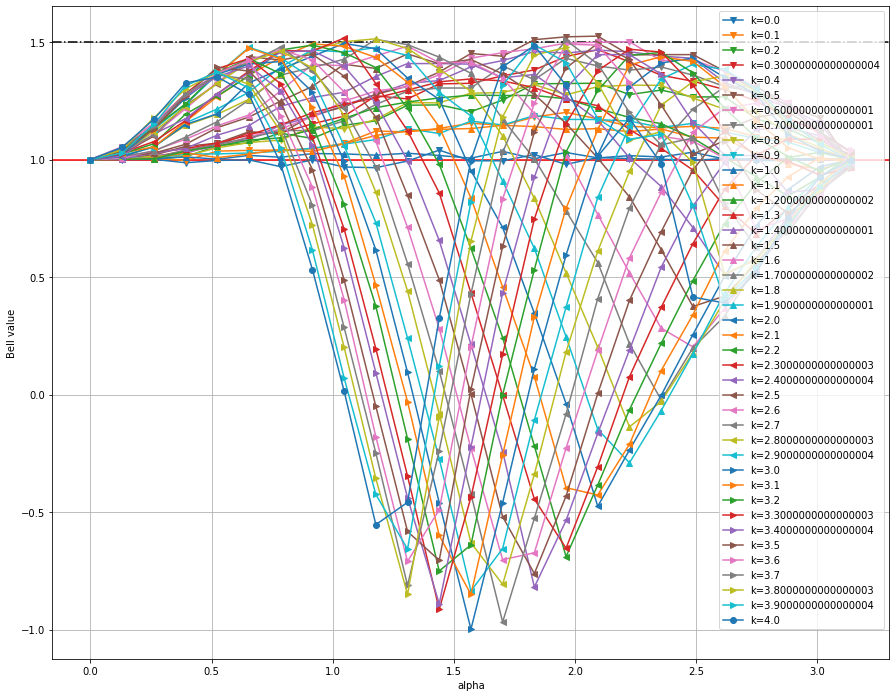

In [42]:
# 2d plot
fig5 = plt.figure(figsize = (15, 12))
ax5 = plt.axes()

ax5.axhline(y=1, color='r', linestyle='-')
ax5.axhline(y=1.5, color='k', linestyle='-.')

for i in range(10):
    ax5.plot(x_pi, Z_smooth[i], "v-", label = "k=" + str(k_list[i]))
for i in range(10, 20):
    ax5.plot(x_pi, Z_smooth[i], "^-", label = "k=" + str(k_list[i]))
for i in range(20, 30):
    ax5.plot(x_pi, Z_smooth[i], "<-", label = "k=" + str(k_list[i]))
for i in range(30, 40):
    ax5.plot(x_pi, Z_smooth[i], ">-", label = "k=" + str(k_list[i]))
ax5.plot(x_pi, Z_smooth[40], "o-", label = "k=" + str(k_list[40]))
ax5.set_xlabel('alpha')
ax5.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax5.legend()

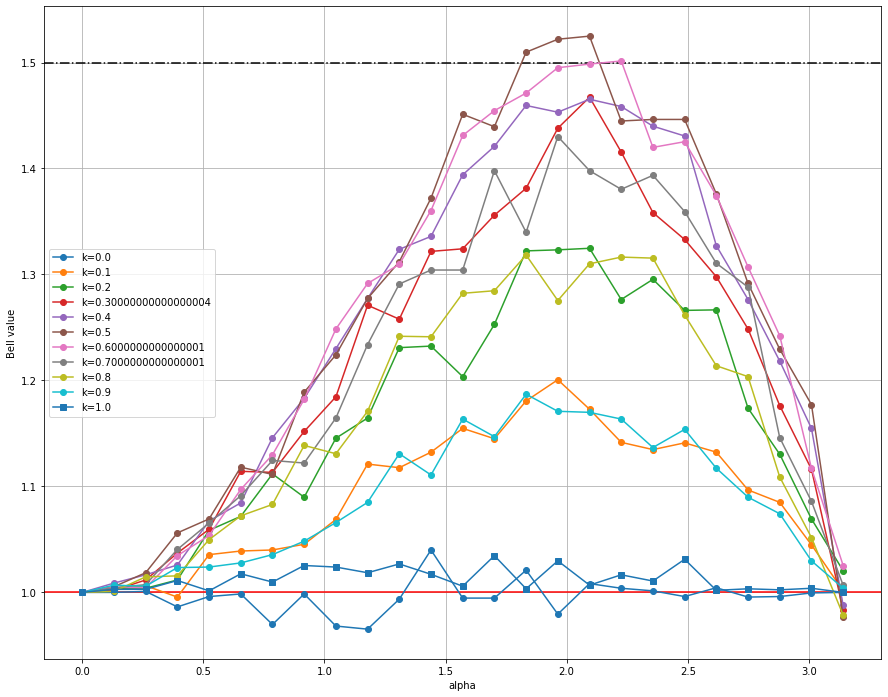

In [37]:
# 2d plot
fig5 = plt.figure(figsize = (15, 12))
ax5 = plt.axes()

ax5.axhline(y=1, color='r', linestyle='-')
ax5.axhline(y=1.5, color='k', linestyle='-.')

for i in range(10):
    ax5.plot(x_pi, Z_smooth[i], "o-", label = "k=" + str(k_list[i]))
ax5.plot(x_pi, Z_smooth[10], "s-", label = "k=" + str(k_list[10]))
ax5.set_xlabel('alpha')
ax5.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax5.legend()

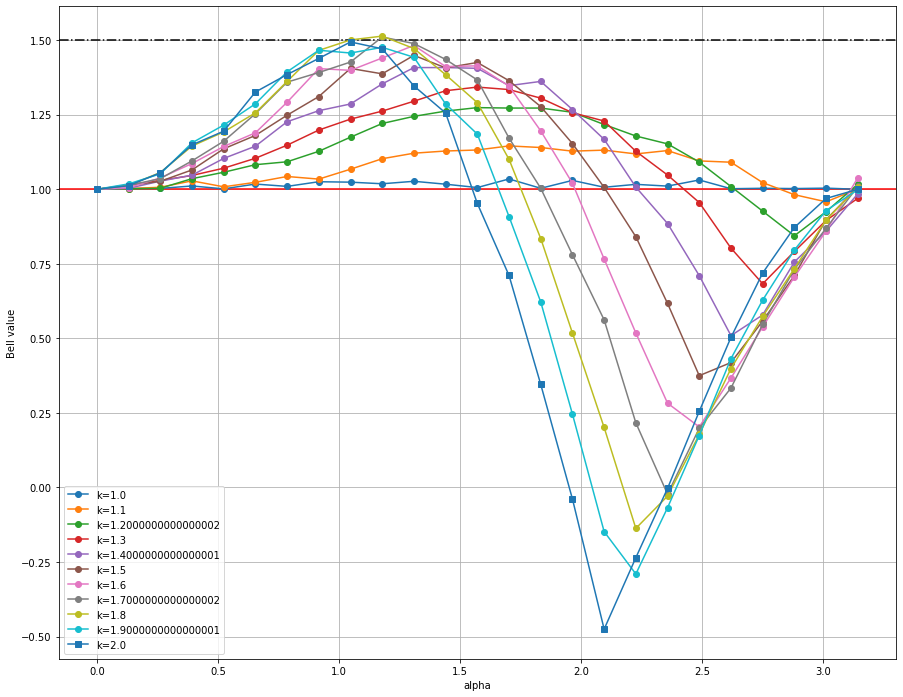

In [38]:
# 2d plot
fig5 = plt.figure(figsize = (15, 12))
ax5 = plt.axes()

ax5.axhline(y=1, color='r', linestyle='-')
ax5.axhline(y=1.5, color='k', linestyle='-.')

for i in range(10, 20):
    ax5.plot(x_pi, Z_smooth[i], "o-", label = "k=" + str(k_list[i]))
ax5.plot(x_pi, Z_smooth[20], "s-", label = "k=" + str(k_list[20]))
ax5.set_xlabel('alpha')
ax5.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax5.legend()

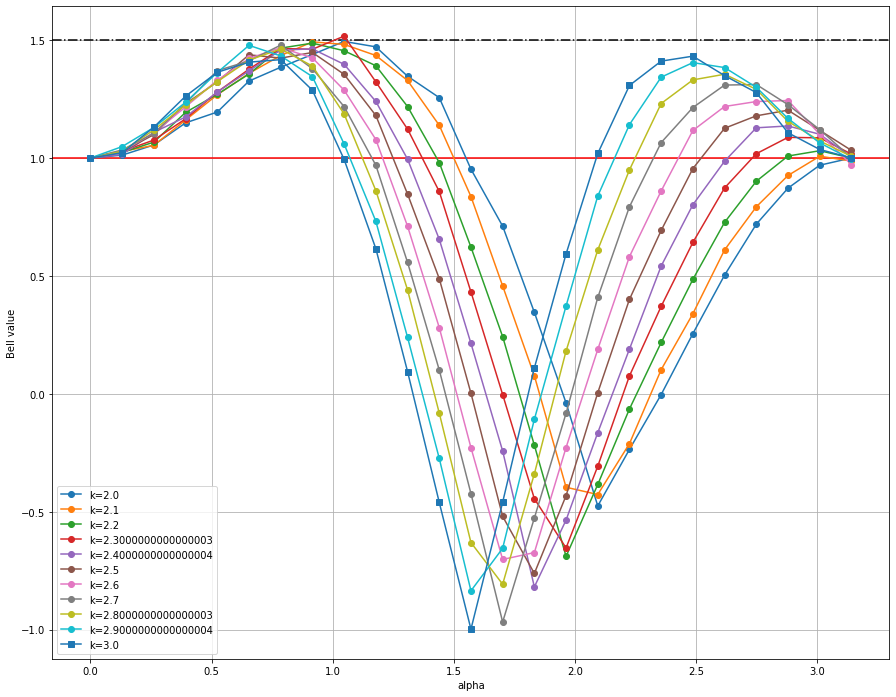

In [39]:
# 2d plot
fig5 = plt.figure(figsize = (15, 12))
ax5 = plt.axes()

ax5.axhline(y=1, color='r', linestyle='-')
ax5.axhline(y=1.5, color='k', linestyle='-.')

for i in range(20, 30):
    ax5.plot(x_pi, Z_smooth[i], "o-", label = "k=" + str(k_list[i]))
ax5.plot(x_pi, Z_smooth[30], "s-", label = "k=" + str(k_list[30]))
ax5.set_xlabel('alpha')
ax5.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax5.legend()

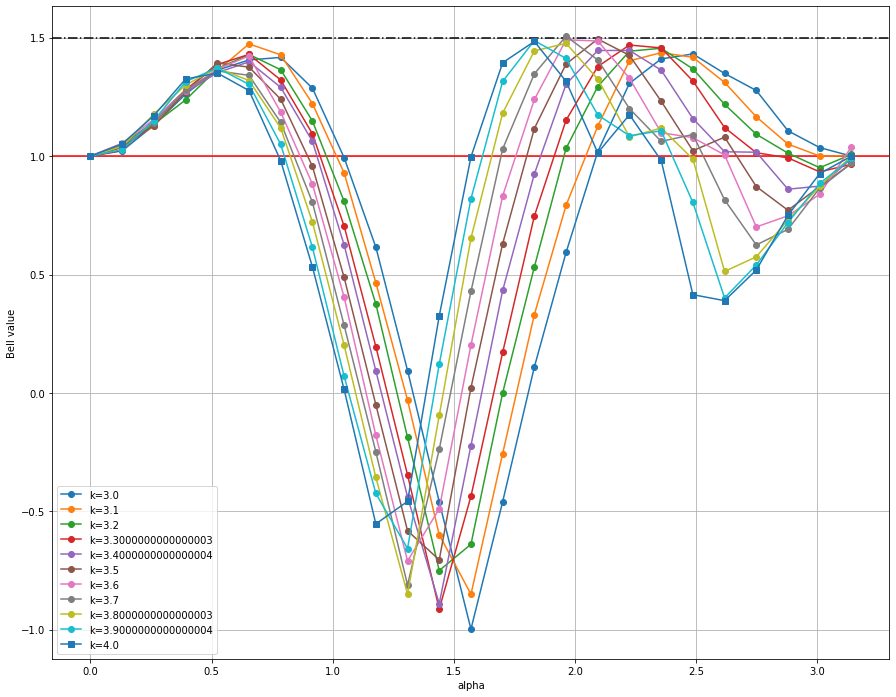

In [40]:
# 2d plot
fig5 = plt.figure(figsize = (15, 12))
ax5 = plt.axes()

ax5.axhline(y=1, color='r', linestyle='-')
ax5.axhline(y=1.5, color='k', linestyle='-.')

for i in range(30, 40):
    ax5.plot(x_pi, Z_smooth[i], "o-", label = "k=" + str(k_list[i]))
ax5.plot(x_pi, Z_smooth[40], "s-", label = "k=" + str(k_list[40]))
ax5.set_xlabel('alpha')
ax5.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax5.legend()

Text(0.5, 0, 'bell')

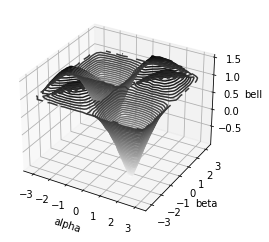

In [7]:
fig1 = plt.figure()
ax1 = plt.axes(projection = '3d')
ax1.contour3D(X, Y, Z, 50, cmap = 'binary')
ax1.set_xlabel('alpha')
ax1.set_ylabel('beta')
ax1.set_zlabel('bell')

Text(0.5, 0, 'Bell value')

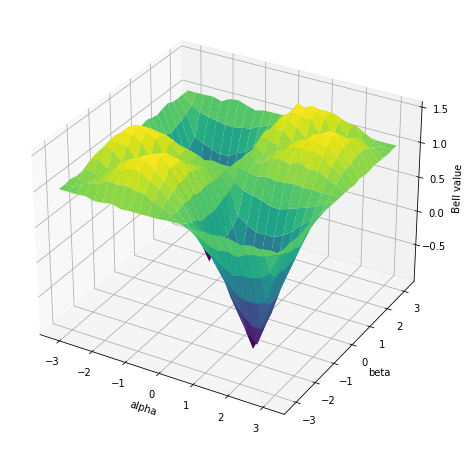

In [8]:
fig2 = plt.figure(figsize = (14, 8))
ax2 = plt.axes(projection = '3d')
ax2.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax2.set_xlabel('alpha')
ax2.set_ylabel('beta')
ax2.set_zlabel('Bell value')

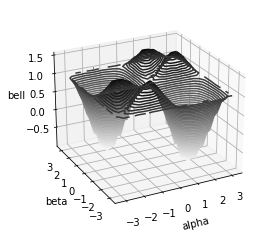

In [9]:
ax1.view_init(24, -117)
fig1

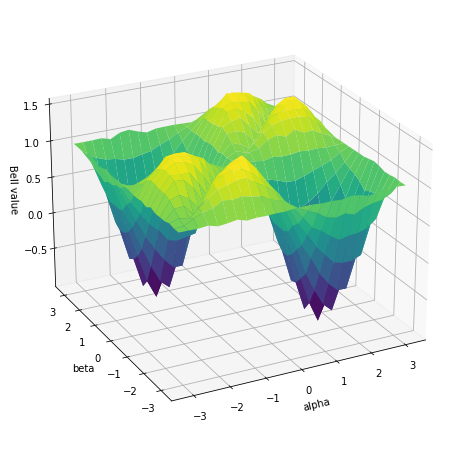

In [10]:
ax2.view_init(24, -117)
fig2

In [11]:
i_max = [0, 0, 0, 0]
j_max = [0, 0, 0, 0]

def get_max_Z(i):
    return Z[i_max[i], j_max[i]] if i >= 0 and i < 4 else -100

# find maximum points
for i in range(25):
    for j in range(25):
        max_index = -1
        for k in range(4):
            if Z[i, j] > get_max_Z(k):
                max_index += 1
            else:
                break
        for k in range(max_index):
            i_max[k] = i_max[k + 1]
            j_max[k] = j_max[k + 1]
        if max_index >= 0:
            i_max[max_index] = i
            j_max[max_index] = j
            
print(i_max)
print(j_max)
print("\nindice")
print([x * 25 for x in i_max])
print(j_max)
print(list(map(lambda x, y: x * 25 + y, i_max, j_max)))
print("\nvalues")
print(Z.flatten()[list(map(lambda x, y: x * 25 + y, i_max, j_max))])


[4, 5, 4, 20]
[9, 9, 8, 15]

indice
[100, 125, 100, 500]
[9, 9, 8, 15]
[109, 134, 108, 515]

values
[1.51269531 1.51660156 1.52392578 1.52490234]


In [12]:
def is_maximum(i, j):
    size = 2
    error = 1
    di = []
    dj = []
    for k in range(size * 2 + 1):
        for l in range(size * 2 + 1):
            if k == size and l == size:
                continue
            di.append(k - size)
            dj.append(l - size)
            
    #if i == size and j == size:
    #    print(di)
    #    print(dj)
    
    count = 0
    for k in range(len(di)):
        temp_i = i + di[k]
        temp_j = j + dj[k]
        if temp_i >= 0 and temp_j >= 0 and temp_i < 25 and temp_j < 25:
            if Z[i, j] <= Z[temp_i, temp_j]:
                count += 1
        else:
            return False
    return count <= error

# find maximum points
max_list = []
for i in range(25):
    for j in range(25):
        if is_maximum(i, j):
            max_list.append((i, j))
            
print(max_list)



[(4, 8), (5, 9), (8, 3), (8, 4), (16, 20), (17, 21), (20, 15), (20, 16)]


In [13]:
for (i, j) in max_list:
    print("Z[ " + str(i) + ", " + str(j) + " ]: " + str(Z[i, j]))

Z[ 4, 8 ]: 1.52392578125
Z[ 5, 9 ]: 1.5166015625
Z[ 8, 3 ]: 1.49365234375
Z[ 8, 4 ]: 1.4775390625
Z[ 16, 20 ]: 1.49658203125
Z[ 17, 21 ]: 1.48095703125
Z[ 20, 15 ]: 1.52490234375
Z[ 20, 16 ]: 1.482421875


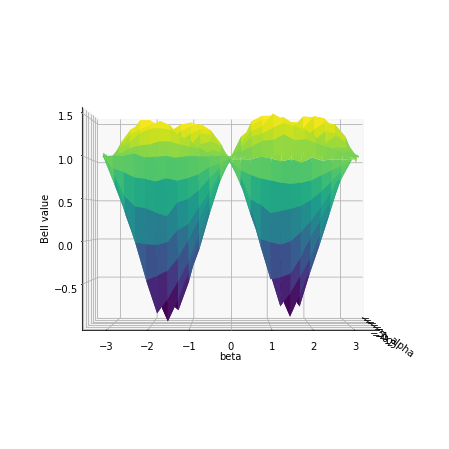

In [19]:
ax2.view_init(0, 0)
fig2

In [14]:
def get_bell_value(counts_all):
    z = np.zeros(13)
    for i in range(13):
        counts = counts_all[i * 3 : i * 3 + 3]

        average = [ 0, 0, 0 ]
        for j in range(3):
            for key in counts[j]:
                average[j] += counts[j][key] * (1 if key[0] == key[1] else -1)
            average[j] /= shots

        z[i] = abs(average[0] - average[1]) - average[2]
    
    return z

In [15]:
quito_backend = ut_provider.get_backend("ibmq_quito")
job_quito = quito_backend.retrieve_job("61af0d03eeb4d447c8b09043")
result_quito = job_quito.result()
z_quito = get_bell_value(result_quito.get_counts())

In [16]:
bogota_backend = ut_provider.get_backend("ibmq_bogota")
job_bogota = bogota_backend.retrieve_job("61b1a2ae72d4b53c56a7100e")
result_bogota = job_bogota.result()
z_bogota = get_bell_value(result_bogota.get_counts())

In [17]:
kawasaki_backend = ut_provider.get_backend("ibm_kawasaki")
job_kawasaki = kawasaki_backend.retrieve_job("61b706f75d7c536b17b0ad78")
result_kawasaki = job_kawasaki.result()
z_kawasaki = get_bell_value(result_kawasaki.get_counts())

In [13]:
print(quito_backend.configuration().basis_gates)
print(bogota_backend.configuration().basis_gates)
print(kawasaki_backend.configuration().basis_gates)

['id', 'rz', 'sx', 'x', 'cx', 'reset']
['id', 'rz', 'sx', 'x', 'cx', 'reset']
['id', 'rz', 'sx', 'x', 'cx', 'reset']


In [46]:
# cut at plane: y=2x
z_simulator = Z.flatten()[6 : 25 * 25 - 6 : 25 * 2 + 1]
z_noiseless = bell_theory(x, y)

x1000 = np.linspace(-np.pi / 2, np.pi / 2, 1000)
y1000 = np.linspace(-np.pi, np.pi, 1000)
z_noiseless1000 = bell_theory(x1000, y1000)

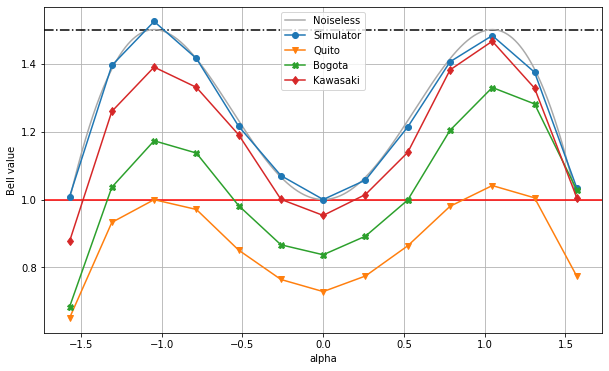

In [48]:
# 2d plot
fig6 = plt.figure(figsize = (10, 6))
ax6 = plt.axes()

ax6.axhline(y=1, color='r', linestyle='-')
ax6.axhline(y=1.5, color='k', linestyle='-.')

ax6.plot(x1000, z_noiseless1000, "-", color = "darkgray", label = "Noiseless")
ax6.plot(x, z_simulator, "o-", label = "Simulator")
ax6.plot(x, z_quito, "v-", label = "Quito")
ax6.plot(x, z_bogota, "X-", label = "Bogota")
ax6.plot(x, z_kawasaki, "d-", label = "Kawasaki")
ax6.set_xlabel('alpha')
ax6.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax6.legend()

In [14]:
print(z_kawasaki[2])
print(z_kawasaki[10])
print(z_quito)
print(z_kawasaki)

1.3896484375
1.4658203125
[0.65136719 0.93261719 0.99951172 0.97070312 0.85107422 0.76464844
 0.72900391 0.77490234 0.86376953 0.97998047 1.04101562 1.00488281
 0.77392578]
[0.87695312 1.25927734 1.38964844 1.33007812 1.19042969 1.00048828
 0.953125   1.01464844 1.13867188 1.38134766 1.46582031 1.32763672
 1.00488281]


In [56]:
ratio_simulator = z_simulator / z_noiseless

In [57]:
# Jan 11 2022
bogota_backend = ut_provider.get_backend("ibmq_bogota")
job_id_list = ["61dd2e60d1eb07800b492b6b", "61dd2e639307b91ddd6bc4f8", "61dd2e65fde78b3995dbb4b7", "61dd2e688adee6673c77eed8",\
              "61dd2e6a8cd5fc6ab746a80b", "61dd2e6d87d4f80bdd23f9a5", "61dd2e6f87d4f861cf23f9a6", "61dd2e710a744adbf599ce31"]
z_edge_bogota = []
for id in job_id_list:
    job_bogota = bogota_backend.retrieve_job(id)
    result_bogota = job_bogota.result()
    z_edge_bogota.append(get_bell_value(result_bogota.get_counts()))

In [58]:
ratio_edge_bogota = []
for i in range(len(z_edge_bogota)):
    ratio_edge_bogota.append(z_edge_bogota[i] / z_noiseless)

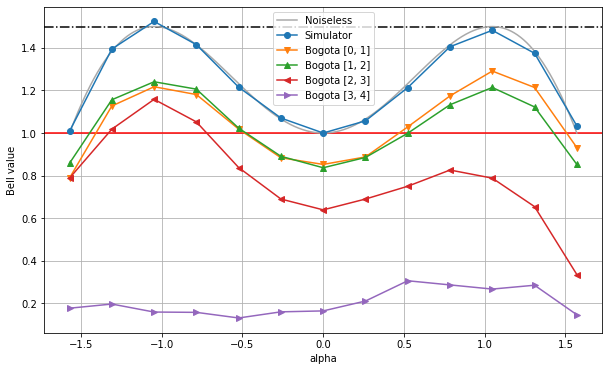

In [50]:
# 2d plot
fig3 = plt.figure(figsize = (10, 6))
ax3 = plt.axes()

ax3.axhline(y=1, color='r', linestyle='-')
ax3.axhline(y=1.5, color='k', linestyle='-.')

ax3.plot(x1000, z_noiseless1000, "-", color = "darkgray", label = "Noiseless")
ax3.plot(x, z_simulator, "o-", label = "Simulator")
# ax3.plot(x, z_quito, "v-", label = "Quito")
# ax3.plot(x, z_bogota, "P-", label = "Bogota")
ax3.plot(x, z_edge_bogota[0], "v-", label = "Bogota [0, 1]")
ax3.plot(x, z_edge_bogota[2], "^-", label = "Bogota [1, 2]")
ax3.plot(x, z_edge_bogota[4], "<-", label = "Bogota [2, 3]")
ax3.plot(x, z_edge_bogota[6], ">-", label = "Bogota [3, 4]")
#ax3.plot(x, z_edge_bogota[4], "v-", label = "Bogota [1, 0]")
#ax3.plot(x, z_edge_bogota[5], "^-", label = "Bogota [2, 1]")
#ax3.plot(x, z_edge_bogota[6], "<-", label = "Bogota [3, 2]")
#ax3.plot(x, z_edge_bogota[7], ">-", label = "Bogota [4, 3]")
ax3.set_xlabel('alpha')
ax3.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax3.legend()

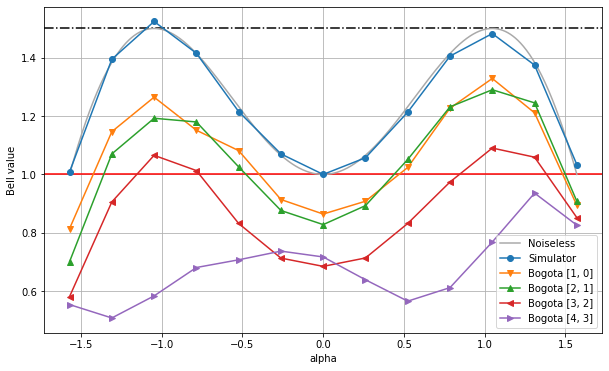

In [51]:
# 2d plot
fig4 = plt.figure(figsize = (10, 6))
ax4 = plt.axes()

ax4.axhline(y=1, color='r', linestyle='-')
ax4.axhline(y=1.5, color='k', linestyle='-.')

ax4.plot(x1000, z_noiseless1000, "-", color = "darkgray", label = "Noiseless")
ax4.plot(x, z_simulator, "o-", label = "Simulator")
#ax4.plot(x, z_edge_bogota[0], "1-", label = "Bogota [0, 1]")
#ax4.plot(x, z_edge_bogota[1], "2-", label = "Bogota [1, 2]")
#ax4.plot(x, z_edge_bogota[2], "3-", label = "Bogota [2, 3]")
#ax4.plot(x, z_edge_bogota[3], "4-", label = "Bogota [3, 4]")
ax4.plot(x, z_edge_bogota[1], "v-", label = "Bogota [1, 0]")
ax4.plot(x, z_edge_bogota[3], "^-", label = "Bogota [2, 1]")
ax4.plot(x, z_edge_bogota[5], "<-", label = "Bogota [3, 2]")
ax4.plot(x, z_edge_bogota[7], ">-", label = "Bogota [4, 3]")
ax4.set_xlabel('alpha')
ax4.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax4.legend()

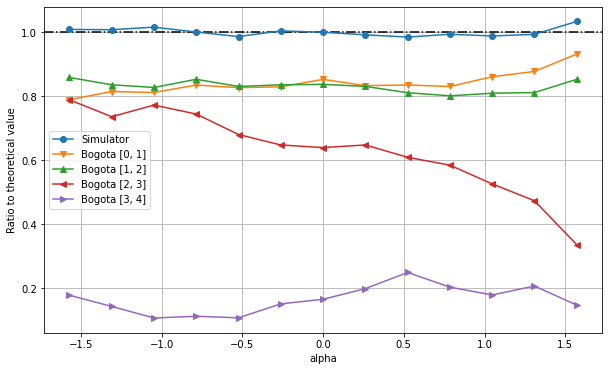

In [59]:
# 2d plot
fig7 = plt.figure(figsize = (10, 6))
ax7 = plt.axes()

ax7.axhline(y=1, color='k', linestyle='-.')

ax7.plot(x, ratio_simulator, "o-", label = "Simulator")
ax7.plot(x, ratio_edge_bogota[0], "v-", label = "Bogota [0, 1]")
ax7.plot(x, ratio_edge_bogota[2], "^-", label = "Bogota [1, 2]")
ax7.plot(x, ratio_edge_bogota[4], "<-", label = "Bogota [2, 3]")
ax7.plot(x, ratio_edge_bogota[6], ">-", label = "Bogota [3, 4]")
ax7.set_xlabel('alpha')
ax7.set_ylabel('Ratio to theoretical value')
plt.grid(which='major',axis='both')
ax7.legend()

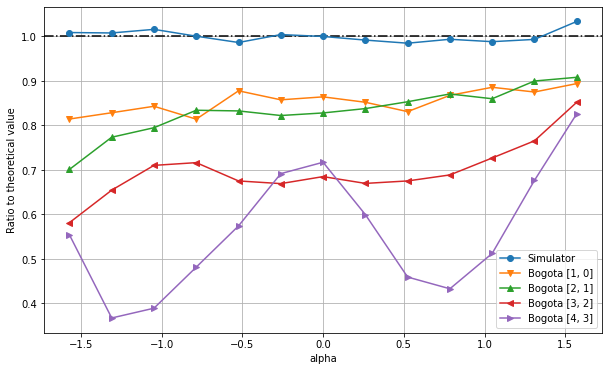

In [60]:
# 2d plot
fig8 = plt.figure(figsize = (10, 6))
ax8 = plt.axes()

ax8.axhline(y=1, color='k', linestyle='-.')

ax8.plot(x, ratio_simulator, "o-", label = "Simulator")
ax8.plot(x, ratio_edge_bogota[1], "v-", label = "Bogota [1, 0]")
ax8.plot(x, ratio_edge_bogota[3], "^-", label = "Bogota [2, 1]")
ax8.plot(x, ratio_edge_bogota[5], "<-", label = "Bogota [3, 2]")
ax8.plot(x, ratio_edge_bogota[7], ">-", label = "Bogota [4, 3]")
ax8.set_xlabel('alpha')
ax8.set_ylabel('Ratio to theoretical value')
plt.grid(which='major',axis='both')
ax8.legend()

In [61]:
# Dec 9 2021
bogota_backend = ut_provider.get_backend("ibmq_bogota")
job_id_list = ["61b1c4428a022177ae2950fa", "61b1c445e4d3eb15ed5c84bd", "61b1c4488a022136e72950fb", "61b1c44b731fa697bb30628a",\
              "61b1c44d4a55f26faf986c07", "61b1c45015ab79747bb83a42", "61b1c453e4d3eb67875c84be", "61b1c45572d4b564e0a710d7"]
z_edge_bogota = []
for id in job_id_list:
    job_bogota = bogota_backend.retrieve_job(id)
    result_bogota = job_bogota.result()
    z_edge_bogota.append(get_bell_value(result_bogota.get_counts()))

In [64]:
ratio_edge_bogota = []
for i in range(len(z_edge_bogota)):
    ratio_edge_bogota.append(z_edge_bogota[i] / z_noiseless)

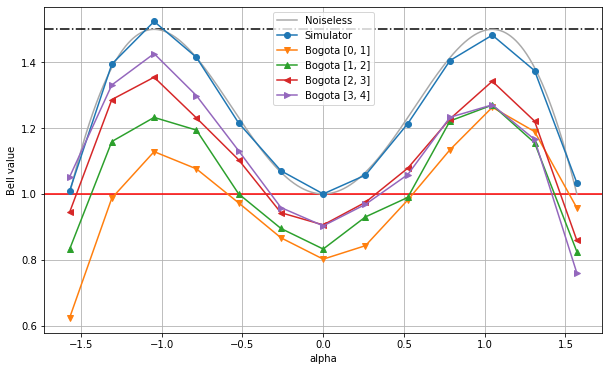

In [53]:
# 2d plot
fig3 = plt.figure(figsize = (10, 6))
ax3 = plt.axes()

ax3.axhline(y=1, color='r', linestyle='-')
ax3.axhline(y=1.5, color='k', linestyle='-.')

ax3.plot(x1000, z_noiseless1000, "-", color = "darkgray", label = "Noiseless")
ax3.plot(x, z_simulator, "o-", label = "Simulator")
# ax3.plot(x, z_quito, "v-", label = "Quito")
# ax3.plot(x, z_bogota, "P-", label = "Bogota")
ax3.plot(x, z_edge_bogota[0], "v-", label = "Bogota [0, 1]")
ax3.plot(x, z_edge_bogota[2], "^-", label = "Bogota [1, 2]")
ax3.plot(x, z_edge_bogota[4], "<-", label = "Bogota [2, 3]")
ax3.plot(x, z_edge_bogota[6], ">-", label = "Bogota [3, 4]")
#ax3.plot(x, z_edge_bogota[4], "v-", label = "Bogota [1, 0]")
#ax3.plot(x, z_edge_bogota[5], "^-", label = "Bogota [2, 1]")
#ax3.plot(x, z_edge_bogota[6], "<-", label = "Bogota [3, 2]")
#ax3.plot(x, z_edge_bogota[7], ">-", label = "Bogota [4, 3]")
ax3.set_xlabel('alpha')
ax3.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax3.legend()

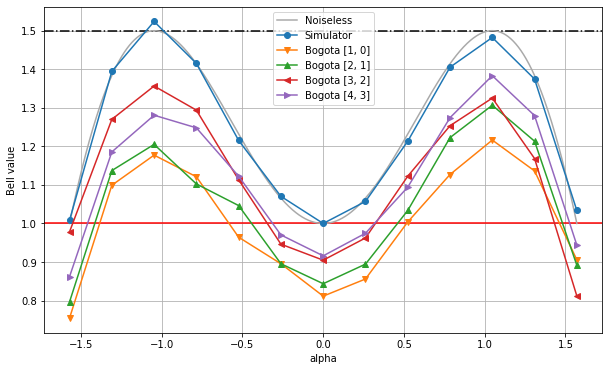

In [54]:
# 2d plot
fig4 = plt.figure(figsize = (10, 6))
ax4 = plt.axes()

ax4.axhline(y=1, color='r', linestyle='-')
ax4.axhline(y=1.5, color='k', linestyle='-.')

ax4.plot(x1000, z_noiseless1000, "-", color = "darkgray", label = "Noiseless")
ax4.plot(x, z_simulator, "o-", label = "Simulator")
#ax4.plot(x, z_edge_bogota[0], "1-", label = "Bogota [0, 1]")
#ax4.plot(x, z_edge_bogota[1], "2-", label = "Bogota [1, 2]")
#ax4.plot(x, z_edge_bogota[2], "3-", label = "Bogota [2, 3]")
#ax4.plot(x, z_edge_bogota[3], "4-", label = "Bogota [3, 4]")
ax4.plot(x, z_edge_bogota[1], "v-", label = "Bogota [1, 0]")
ax4.plot(x, z_edge_bogota[3], "^-", label = "Bogota [2, 1]")
ax4.plot(x, z_edge_bogota[5], "<-", label = "Bogota [3, 2]")
ax4.plot(x, z_edge_bogota[7], ">-", label = "Bogota [4, 3]")
ax4.set_xlabel('alpha')
ax4.set_ylabel('Bell value')
plt.grid(which='major',axis='both')
ax4.legend()

In [26]:
print(len(z_edge_bogota))
print(z_edge_bogota[2])
print(z_edge_bogota[2] / z_noiseless)

8
[0.85839844 1.15625    1.24072266 1.20605469 1.02294922 0.890625
 0.83691406 0.88525391 0.99902344 1.1328125  1.21386719 1.12255859
 0.85253906]
[0.85839844 0.83564393 0.82714844 0.85280945 0.83028168 0.83561932
 0.83691406 0.83057994 0.81086221 0.8010194  0.80924479 0.81129451
 0.85253906]


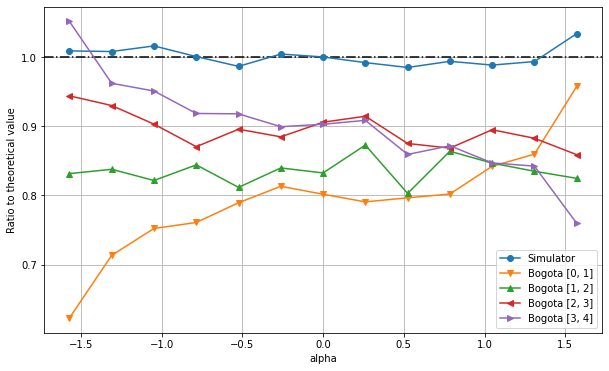

In [65]:
# 2d plot
fig7 = plt.figure(figsize = (10, 6))
ax7 = plt.axes()

ax7.axhline(y=1, color='k', linestyle='-.')

ax7.plot(x, ratio_simulator, "o-", label = "Simulator")
ax7.plot(x, ratio_edge_bogota[0], "v-", label = "Bogota [0, 1]")
ax7.plot(x, ratio_edge_bogota[2], "^-", label = "Bogota [1, 2]")
ax7.plot(x, ratio_edge_bogota[4], "<-", label = "Bogota [2, 3]")
ax7.plot(x, ratio_edge_bogota[6], ">-", label = "Bogota [3, 4]")
ax7.set_xlabel('alpha')
ax7.set_ylabel('Ratio to theoretical value')
plt.grid(which='major',axis='both')
ax7.legend()

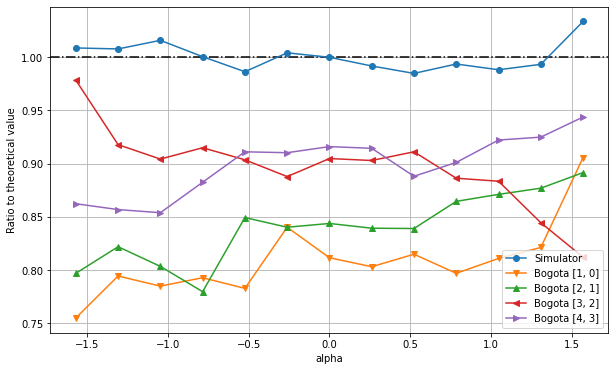

In [66]:
# 2d plot
fig8 = plt.figure(figsize = (10, 6))
ax8 = plt.axes()

ax8.axhline(y=1, color='k', linestyle='-.')

ax8.plot(x, ratio_simulator, "o-", label = "Simulator")
ax8.plot(x, ratio_edge_bogota[1], "v-", label = "Bogota [1, 0]")
ax8.plot(x, ratio_edge_bogota[3], "^-", label = "Bogota [2, 1]")
ax8.plot(x, ratio_edge_bogota[5], "<-", label = "Bogota [3, 2]")
ax8.plot(x, ratio_edge_bogota[7], ">-", label = "Bogota [4, 3]")
ax8.set_xlabel('alpha')
ax8.set_ylabel('Ratio to theoretical value')
plt.grid(which='major',axis='both')
ax8.legend()

In [18]:
for i in range(8):
    print(z_edge_bogota[i][6])

0.8017578125
0.83251953125
0.90576171875
0.90283203125
0.8115234375
0.84375
0.90478515625
0.916015625


In [18]:
a = [ 3, 5 ]
print(a[0] == a[1])
print(a[0] == a[1] - 2)
True and False

False
True


False

In [22]:
print(range(1, 3))
for i in range(1, 3):
    print(i)

range(1, 3)
1
2


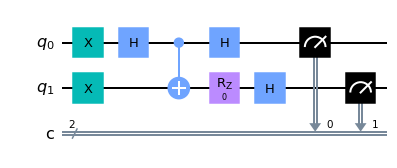

In [14]:
qc0, qc1, qc2 = make_bell_circuit(x3D[12], y3D[12])
qc0.draw()

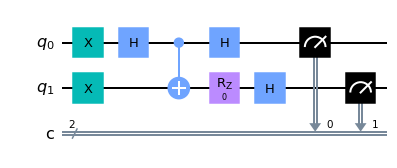

In [15]:
qc1.draw()

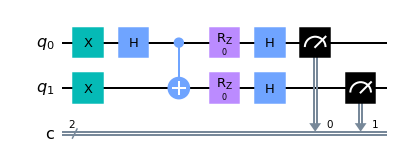

In [16]:
qc2.draw()